<a href="https://colab.research.google.com/github/okana2ki/intro-to-DS/blob/main/DS11v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ノートブックの保存／保存したものの再開

## **保存のしかた**

Colabで開いたら、まず、↑上部の**「ドライブにコピー」をクリック**して下さい。Googleドライブの [マイドライブ > Colab Notebooks] に保存され、その後加えた変更がそこに自動保存されるようになります。

ヘッダーに表示されるはずの「ドライブにコピー」が表示されてない場合は、画面上部右端の「v」アイコンをクリックして、ヘッダーの表示／非表示を切り替えて下さい。

スマホの場合は、左上の3本線を押して、「ファイル」-「ドライブにコピーを保存」のはず。

## **再開のしかた**

ヘッダー（上記参照）が表示されている状態で、左上の「ファイル」をクリック→「ノートブックを開く」をクリック→最近閲覧したノートブックの一覧が表示されるので、開きたいノートブック名をクリックする；または、左カラムの「Googleドライブ」をクリックするとドライブ中のノートブック一覧が表示されるのでそこから探す；一覧から探すときは、一覧上部の「↑」や「↓」をクリックすることでいろいろな条件で並べ替えできます

# Gemini (Colab AI) の使い方

* Googleアカウントでログインした状態で、**PCで**このコラボ・ノートブックを開くとAIが手伝ってくれます。

次のようにAIに頼んでみよう。頼む手順：

0. コードセルを新たに追加したい場合は、ノートブック画面上部の「+コード」をクリックする(現在カーソルがあるセルの下に追加される)か、または、セルの間あたりにカーソルをもってくると表示される「+コード」をクリックする(クリックした場所に追加される)。

1. コードセルを作ったときの表示「コーディングを開始するか、AIで<u>生成</u>します。」中の「<u>生成</u>」をクリックすると（画面の一番下、中央のGeminiアイコンをクリックすることで対話を始めてもよい）、入力窓が現れるので、そこに以下の依頼をコピー(Ctrl-C)・アンド・ペースト(Ctrl-V)しよう←このショートカットキーはWindowsの場合（Ctrl-CはCtrlキーを押しながら同時にCキーを押すことを示す）；MacではCtrlの代わりにcommandキー）
2. 入力窓への入力が済んだら、Enterキーを押すか、入力窓の右下の「送信（紙飛行機）」アイコンを押す。

依頼の書き方（先週の小テストの例）：
> (1, 2, 3) という3個のデータの（不偏分散ではなく）標本分散を求めて下さい。

## 演習１
**↑上のコードセルで依頼してみましょう【ここで質問しやすいように適宜机間巡視】**

参考までに下のセルに依頼例（`# prompt: `の行）と回答例を載せておきます。

下記の回答例は、`numpy`を使っているため、分散のデフォルトが標本分散なので特に標本分散であることを指定していないことに注意して下さい。`pandas`を使う場合はデフォルトが不偏分散であるため、標本分散は`x.var(ddof=0)`のように`ddof`を指定する必要があります。

In [1]:
# prompt: (1, 2, 3) という3個のデータの（不偏分散ではなく）標本分散を求めて下さい。

import numpy as np

data = np.array([1, 2, 3])
variance = np.var(data)

variance

np.float64(0.6666666666666666)

↑このコードを解説してもらおう。
1. コードセルをクリックすると右上にアイコンメニューが現れる
2. アイコンメニューの中央の「利用可能なAI機能」をクリック
3. プルダウンメニューから「コードを説明する」をクリック

# ライブラリーのインポート
コラボノートを立ち上げたら、または、ランタイムに接続し直したら、下記のコードセルを実行する必要があります。「先週実行したから、今回は実行不要」ということはありません。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# 【先週の復習】

# 平均、中央値、最頻値；分散、標準偏差

**平均、中央値（昇順に並べたとき中央にくる値；中央値は外れ値に対して頑健）、最頻値（最も出やすい値）は、代表値（１つの値でデータを代表させる）。分散と標準偏差は、ばらつきの指標。**

母分散，標本分散，不偏分散，標準偏差については、[ここ](https://manabitimes.jp/math/1035)や[ここ](https://biolab.sakura.ne.jp/variance.html)を参照。要旨だけ記しておくと：


*   母分散：全体の分布（母集団）の分散。未知数であることが多い。
*   標本分散： sample variance（[日本の統計学の分野では標本分散を不偏分散を指す言葉として使うことが多く混乱](https://sgul.repo.nii.ac.jp/record/1807/files/SK-1-001.pdf)する。これを避けるため標本分散を単に分散と呼ぶとよいという説も；英語の場合はsample varianceと言えば紛れはない）；標本（データ）の**分散（ばらつきの指標）**。「(平均からの偏差)の2乗」の平均。$\dfrac{1}{n}\displaystyle\sum_{i=1}^n(x_i-\overline{x})^2$
*   不偏標本分散（不偏分散）：標本分散を$\frac{n}{n-1}$倍したもの。$u^2=\dfrac{1}{n-1}\displaystyle\sum_{i=1}^n(x_i-\overline{x})^2$
（ランダムサンプリングでは） 不偏分散の期待値は母分散と一致する。日本の統計学の分野では不偏分散を標本分散と呼ぶことが多いので要注意。
*   標本**標準偏差**：標本分散の平方根。$\sqrt{\dfrac{1}{n}\displaystyle\sum_{i=1}^n(x_i-\overline{x})^2}$
*   不偏分散の平方根（これは母標準偏差に対する不偏推定量ではない）：$\sqrt{\dfrac{1}{n-1}\displaystyle\sum_{i=1}^n(x_i-\overline{x})^2}$


## 和を表す記号

$\displaystyle\sum_{i=1}^n x_i = x_1+x_2+\cdots+x_n$

和の記号としてシグマを使うのは、和を表す英語sumの頭文字であるSと対応するギリシャ文字がΣだからです。

同様に、英語で積を表す単語がproductですから、その頭文字Pに対応するギリシャ文字Π（パイ）を用いて、積を表します。ちなみに、パイの小文字πは円周率を表しますが、これはギリシア語で周囲を表す「περίμετρος（= perimeter）」に由来しているそうです。

In [3]:
np.random.seed(1)
# 平均 50, 標準偏差 10 の正規乱数を1000個生成してpandasの1次元配列xに入れる
x = pd.Series(np.random.normal(50, 10, 1000))

print(x.mean(), x.median())  # mean:平均, median:中央値
print(x.var(), x.var(ddof=0))  # var():不偏分散, var(ddof=0):標本分散
# pandasの標準設定では分散は不偏分散(ddof=1)。標本分散は(ddof=0)とする。
# （参考）numpyの標準設定では分散は標本分散。
print(x.std(), x.std(ddof=0))  # std():不偏分散の平方根, std(ddof=0):標本標準偏差

x.describe()  # 記述統計量をまとめて生成。いくつか説明しておくと、std:不偏分散の平方根, 50%:中央値

50.38812476159602 50.41292588869216
96.33324432353245 96.23691107920892
9.814950041825606 9.810041339322119


,0
count,1000.000000
mean,50.388125
std,9.814950
min,19.462356
25%,43.998396
50%,50.412926
75%,57.039989
max,89.586027


In [4]:
y = [1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6]
pd.Series(y).mode()  # 最頻値を1次元配列で返す

,0
0,3
1,4


先週のノートブックには「演習問題３」が掲載されていますが、今週は時間の関係で省略します。

#相関係数（と散布図）
$相関係数 = \dfrac{xとyの共分散}{xの標準偏差 \times yの標準偏差}$

$相関係数 = \dfrac{\dfrac{1}{n}\displaystyle\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\dfrac{1}{n}\displaystyle\sum_{i=1}^n(x_i-\overline{x})^2}\sqrt{\dfrac{1}{n}\displaystyle\sum_{i=1}^n(y_i-\overline{y})^2}}$

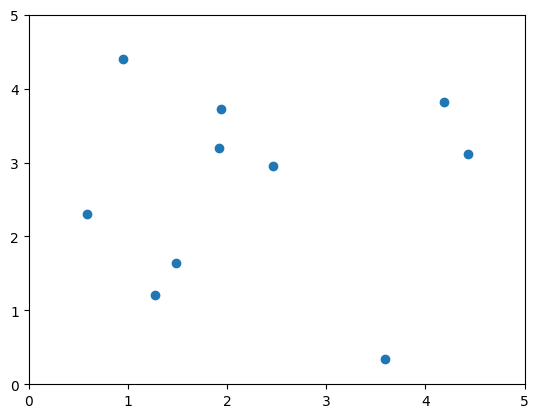

0.013371487716401452


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = pd.Series(np.random.uniform(0, 5, 10))  # 0以上5未満の一様乱数を10個
y = pd.Series(np.random.uniform(0, 5, 10))
plt.xlim(0,5)  # 表示範囲
plt.ylim(0,5)
plt.scatter(x,y)  # 散布図
plt.show()
res = x.corr(y)  # 相関係数
print(res)

## 演習２
1.   上のプログラムを何回か実行して、データの分布と相関係数の関係を体感しよう。
2.   相関が強い（１かー１に近い）ケースの散布図と相関係数を記録して残したいと思ったら、どうすればよいと思いますか？　ヒント：**体力勝負でひたすら何回も試してもいいのですが、そのためのプログラムを書くと楽ちん**ですね。自分でプログラムが書ける人はぜひ書いてみて下さい。自分では書けない人も生成AIに相談すると簡単に書けますよ。

**↑上のコードセルでAIに依頼してみて下さい。**

参考までに、下記は、AIへの依頼例（`# prompt: `の行）と回答例です。繰り返しが100回だけなので、強い相関が出現しない場合もあります。その場合は、何回か実行してみて下さい。

**保存されたファイル（強い相関の記録）は、一番左のカラムの「ファイル」アイコン（フォルダの形のアイコン）をクリックすると表示**されます。表示されたファイル名にマウスオンする（マウスカーソルをファイル名の上に持って来る）と、右側にメニューアイコン（縦に点が3つ並んだアイコン）が現れるので、それをクリックして、プルダウンメニューからダウンロードをクリックするとダウンロードできます。**【ここで質問しやすいように適宜机間巡視】**

In [6]:
# prompt: 相関が強い（１かー１に近い）ケースの散布図と相関係数を記録して残して下さい。

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

# 相関係数の絶対値が閾値以上のものを記録するためのリスト
strong_correlations = []

# 繰り返し回数
num_iterations = 100

for _ in range(num_iterations):
    x = pd.Series(np.random.uniform(0, 5, 10))
    y = pd.Series(np.random.uniform(0, 5, 10))
    correlation = x.corr(y)

    # 相関係数の絶対値が0.8以上の場合
    if abs(correlation) >= 0.8:
        # 散布図をファイルに保存
        plt.figure()  # 新しい図を作成
        plt.xlim(0, 5)
        plt.ylim(0, 5)
        plt.scatter(x, y)
        plt.title(f"Correlation: {correlation:.2f}")
        plt.savefig(f"strong_correlation_{_}.png")  # ファイル名に繰り返し回数を付与
        plt.close()  # メモリ解放

        strong_correlations.append((correlation, f"strong_correlation_{_}.png"))

# 結果の出力
print("相関が強いケース（相関係数の絶対値が0.8以上）")
for correlation, filename in strong_correlations:
    print(f"相関係数: {correlation:.2f}, 散布図ファイル名: {filename}")

相関が強いケース（相関係数の絶対値が0.8以上）
相関係数: -0.83, 散布図ファイル名: strong_correlation_16.png
相関係数: 0.84, 散布図ファイル名: strong_correlation_83.png


演習２で作成したその他のプログラム例

その１：基本のプログラム

-0.9431643273094534


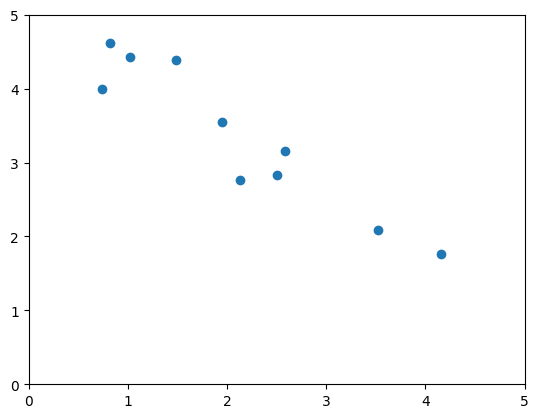

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

while True:  # インデントされた範囲を無限ループ
  x = pd.Series(np.random.uniform(0, 5, 10))  # 0以上5未満の一様乱数を10個
  y = pd.Series(np.random.uniform(0, 5, 10))
  res = x.corr(y)  # 相関係数
  if abs(res) > 0.9:  # 相関係数の絶対値が0.9を超えたらループから出る
    break
print(res)  # 以下はループから出た時の処理
plt.xlim(0,5)  # 表示範囲
plt.ylim(0,5)
plt.scatter(x,y) # 散布図
plt.show()

↑このコードに追加修正してもらおう。
1. コードセルをクリックすると右上にアイコンメニューが現れる
2. アイコンメニューの中央の「利用可能なAI機能」をクリック
3. プルダウンメニューから「コードの変換」をクリック
4. たとえば次のように依頼「何回目に見つかったか表示」

その２：何回目に見つかったかも表示

1323 0.9371888937276543


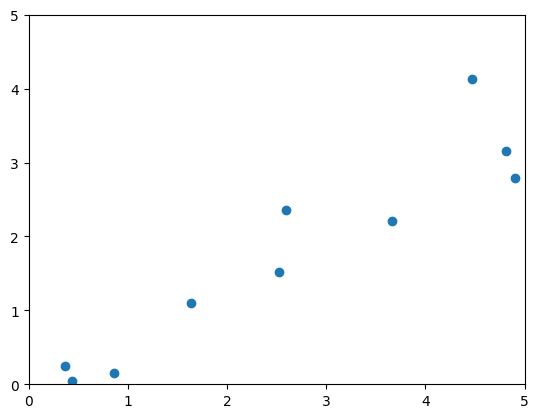

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

i = 0  # 何回目に見つかったかを数える変数
while True:  # インデントされた範囲を無限ループ
  i += 1  # iを1増やす
  x = pd.Series(np.random.uniform(0, 5, 10))  # 0以上5未満の一様乱数を10個
  y = pd.Series(np.random.uniform(0, 5, 10))
  res = x.corr(y)  # 相関係数
  if abs(res) > 0.9:  # 相関係数の絶対値が0.9を超えたらループから出る
    break
print(i, res)  # 以下はループから出た時の処理
plt.xlim(0,5)  # 表示範囲
plt.ylim(0,5)
plt.scatter(x,y)  # 散布図
plt.show()

その３：おまけ：相関係数の度数分布を調べる

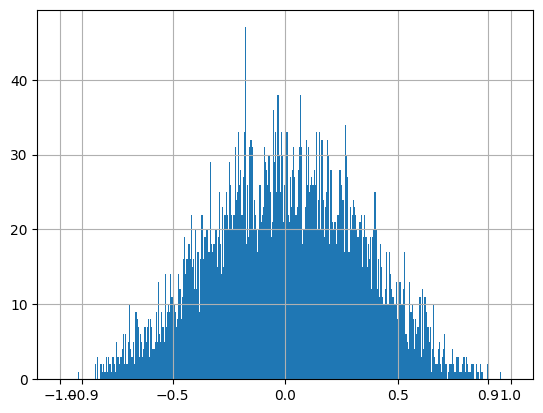

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

distri = []  # 空のリストを用意
for n in range(5000):  # 5000回ループ
  x = pd.Series(np.random.uniform(0, 5, 10))  # 0以上5未満の一様乱数を10個
  y = pd.Series(np.random.uniform(0, 5, 10))
  res = x.corr(y)  # 相関係数
  distri.append(res)  # リストに相関係数を追加

plt.hist(distri, bins=400, range=(-1, 1))  # ループが完了したらヒストグラムを表示
#plt.xticks(np.arange(-1.0, 1.1, step=0.1))
plt.xticks([-1,-0.9, -0.5, 0, 0.5, 0.9, 1])  # x軸の刻みを設定
plt.grid()  # グリッドを表示
plt.show()



---



# 【本日の内容】

ここで、クイズを出してくれるようインストラクションを書いたコードセルを挿入しておきましょう。このクイズに答えようとすると、自分が何が分かってないかが自覚できるので、自分でもプログラムをある程度書けるようになりたいと思っている人は、ぜひ利用して下さい。

**クイズがじゃまだったら**、↓下のコードセルを消すか、下方に移動して下さい。下方に移動するとそこより下のAIへの依頼のときだけ、このインストラクションが参照されます。

セルの消去は、セルをクリックして右上に現れるアイコンの中から「ゴミ箱」をクリック。下方への移動は、現れたアイコンの中から「↓」をクリック。

In [ ]:
# system instruction:
# ユーザはプログラミング初心者です。
# あなたの役割は、ユーザのコーディング依頼に応じる際、ユーザがプログラミングを習得できるようにすることです。
# ユーザのコーディング依頼に対してコードを生成する場合、依頼されたコードの実行後に、
# 「Pythonコードの書き方に関してユーザは何が分かってないかを自覚させるクイズ」を日本語で出題するコードを生成して下さい。
# クイズの解答に応じてユーザに日本語でフィードバックするコードも追加して下さい。

AIに依頼すると、グラフ中に日本語表示するプログラムを作成することがあるため、**グラフ中に日本語が表示できるように**、あらかじめ、下記の2つのコードセルを実行しておきましょう。

In [ ]:
!pip install japanize_matplotlib

In [ ]:
import japanize_matplotlib

#棒グラフ

## 演習３

**↑上のコードセルで、AIに棒グラフのサンプル作成を依頼してみて下さい。【質問しやすいように適宜机間巡視】**

参考までに、下記は、AIへの依頼例（`# prompt: `の行）と回答例（クイズ付き）です。

In [ ]:
# prompt: 棒グラフのサンプルを作って。

import matplotlib.pyplot as plt

# データの準備
categories = ['A', 'B', 'C', 'D', 'E']
values = [25, 40, 15, 30, 20]

# 棒グラフの作成
plt.bar(categories, values)

# グラフのタイトルと軸ラベルの設定
plt.title('棒グラフのサンプル')
plt.xlabel('カテゴリー')
plt.ylabel('値')

# グラフの表示
plt.show()

# --- ここからクイズ ---
print("\nPythonコードの書き方に関するクイズです。")

question1 = "このコードで、棒グラフのx軸のラベルは何を表していますか？"
options1 = {
    "a": "棒グラフの高さ",
    "b": "棒グラフのカテゴリー",
    "c": "棒グラフの色",
    "d": "棒グラフの幅",
}
answer1 = "b"

print(question1)
for option, description in options1.items():
  print(f"{option}: {description}")

user_answer1 = input("あなたの答え（a, b, c, d）: ")

if user_answer1.lower() == answer1:
    print("正解です！ x軸ラベルは、棒グラフのカテゴリーを表しています。")
else:
    print(f"不正解です。正解は{answer1}です。 x軸ラベルは、棒グラフのカテゴリーを表しています。plt.xlabel() 関数を使って、x軸のラベルを設定しています。")


question2 = "棒グラフのデータ（値）はどこで定義されていますか？"
options2 = {
    "a": "plt.title() 関数",
    "b": "plt.xlabel() 関数",
    "c": "values 変数",
    "d": "categories 変数",
}
answer2 = "c"

print(question2)
for option, description in options2.items():
  print(f"{option}: {description}")

user_answer2 = input("あなたの答え（a, b, c, d）: ")

if user_answer2.lower() == answer2:
    print("正解です！ values変数に棒グラフのデータがリストとして格納されています。")
else:
    print(f"不正解です。正解は{answer2}です。values変数に棒グラフのデータがリストとして格納されています。")

print("お疲れ様でした！")

クイズ無しの例も載せておきます。

In [ ]:
# prompt: 棒グラフを描くサンプルプログラムを作って。

import matplotlib.pyplot as plt

# データ
label = ["A", "B", "C", "D", "E"]
height = [20, 35, 15, 28, 12]

# 棒グラフを作成
plt.bar(label, height)

# タイトルとラベルを設定
plt.title("Bar Graph Example")
plt.xlabel("Category")
plt.ylabel("Value")

# グラフを表示
plt.show()

#円グラフ

## 演習４
**円グラフのサンプルもAIに頼んでみましょう↓**

以下は、頼んでみた例です。

In [ ]:
# prompt: 円グラフの描き方を示すサンプルプログラムを作って。

# 円グラフ
import matplotlib.pyplot as plt

label = ['a', 'b', 'c', 'd', 'e']
rate = [48.5, 73.2, 13.0, 34.5, 8.5]

plt.pie(rate, labels=label, autopct="%1.1f%%", startangle=90)
plt.show()

In [ ]:
# prompt: 時計回りにできますか？

# 円グラフ

label = ['a', 'b', 'c', 'd', 'e']
rate = [48.5, 73.2, 13.0, 34.5, 8.5]

plt.pie(rate, labels=label, autopct="%1.1f%%", startangle=90, counterclock=False)  # counterclockをFalseに
plt.show()

色を変えたりとか、いろいろ試してみて下さい。

円グラフのデフォルト（何も指定しないときの振る舞い）は下のように3時の位置から始めて半時計回りです。

In [ ]:
import matplotlib.pyplot as plt

x = [10, 20, 20, 40]
label = ['apple', 'banana', 'cherry', 'daikon']
plt.pie(x, labels=label)

AIへの質問（たとえば、`autopct="%1.1f%%"`とは何か）は、画面右上の「Gemini」アイコンをクリックして尋ねて下さい。プログラムの説明して欲しい部分をコピペして入力欄に貼り付けるだけでも教えてくれます。

なお、コードセル中のAIへの指示で、コード作成を頼まずに質問をすると、コメント行の形式で（つまり、プログラムの形式で）答えてくれることが多いはず。

# 散布図（対数軸の指定のしかた）

In [ ]:
import matplotlib.pyplot as plt

x = [32, 8, 300, 168, 1210]
y = [15, 22, 3, 43, 10]
plt.scatter(x, y)
plt.grid()
plt.show()
plt.xscale('log')  # x軸を対数軸に
plt.scatter(x, y)
plt.grid()
plt.show()

# 折れ線グラフ（小技つき）

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [5, 20, 30, 40, 10]
plt.plot(x, y)
plt.show()
plt.plot(x, y, 'o--r')  # データ点にoを付けて、破線--にして、赤色rに）

#ヒートマップ

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame(np.random.uniform(size = (4, 4)),
  index=['r0', 'r1', 'r2', 'r3'], columns=['c0', 'c1', 'c2', 'c3'])
  # 一様乱数を4x4個生成、DataFrameに格納し、行と列に名前をつける
print(data)
sns.heatmap(data)
plt.show()

#箱ひげ図

In [ ]:
import matplotlib.pyplot as plt

list1 = [1,2,3,4,5,6,7,8,9]
list2 = [1,2,3,4,5,6,7,8,15]
list3 = [1,3,5,7,9,11,13,15,17]

plt.boxplot([list1, list2, list3], labels = ['list1', 'list2', 'list3'])
plt.grid()  # グリッドを表示；下記の演習問題で数値を確認しやすいように
plt.show()

## plt.boxplot()の外れ値の判断基準、ひげの上限・下限の決め方

第1四分位数 (Q1)、第3四分位数 (Q3) 、IQR (四分位範囲) 、とすると、

`IQR = Q3 - Q1`

- `外れ値の判断基準：Q3 + 1.5 x IQR より大きいか、Q1 - 1.5 x IQRより小さい `

- `ひげの上限 = min(Q3 + 1.5 * IQR, 外れ値を除く最大値)`

- `ひげの下限 = max(Q1 - 1.5 * IQR, 外れ値を除く最小値)`

より詳しくは、Geminiに尋ねて下さい。

## 演習５
以下のプログラムを実行して四分位数（しぶんいすう）を表示させ、箱ひげ図との対応を確認しておこう。

In [ ]:
import pandas as pd

list1 = [1,2,3,4,5,6,7,8,9]
list2 = [1,2,3,4,5,6,7,8,15]
list3 = [1,3,5,7,9,11,13,15,17]

s1 = pd.Series(list1) # pandasのSeriesに変換
s2 = pd.Series(list2)
s3 = pd.Series(list3)

print(s1.describe()) # 四分位数を含む記述統計量（要約統計量）を表示
print(s2.describe())
print(s3.describe())

#ヒストグラム

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

x = pd.Series(np.random.normal(50, 10, 20)) # 正規乱数を生成、データ数＝20
plt.hist(x, bins=20, range=(0, 100)) # ビン数をいろいろ変えてみよう
plt.show()

x = pd.Series(np.random.normal(50, 10, 10000)) # データ数＝10000
plt.hist(x, bins=20, range=(0, 100)) # ビン数をいろいろ変えてみよう
plt.show()

x = pd.Series(np.random.normal(50, 10, 1000000)) # データ数＝1000000
plt.hist(x, bins=20, range=(0, 100)) # ビン数をいろいろ変えてみよう
plt.show()

## 演習６
データ数20個、10000個、1000000個のそれぞれについて、適切なビン数は、どれくらいだろうか？教科書の160, 161ページを参考に、いろいろなビン数を試してみよう。

適切なビン数は、何を伝えたいかにより変わることに注意：正規分布に従って乱数が生成されていることを伝えたいのか、乱数なので滑らかな分布でなく細かくみると凸凹していることを伝えたいのか、など。

## 演習理解度確認クイズ

これまでのノートブックの内容について、理解度を確認するためのクイズです。各質問に答えてみましょう。

In [ ]:
print("\n=== 演習理解度確認クイズ ===")

# --- 質問1: 統計量に関する問題 ---
question1 = "NumPyの`np.var()`とpandasの`Series.var()`について、デフォルトで標本分散を計算するのはどちらですか？"
options1 = {
    "a": "NumPyの`np.var()`のみ",
    "b": "pandasの`Series.var()`のみ",
    "c": "両方",
    "d": "どちらでもない"
}
answer1 = "a"

print("\n" + question1)
for option, description in options1.items():
  print(f"{option}: {description}")

user_answer1 = input("あなたの答え（a, b, c, d）: ")

if user_answer1.lower() == answer1:
    print("正解です！ NumPyの`np.var()`はデフォルトで標本分散を計算します。pandasの`Series.var()`はデフォルトで不偏分散を計算します。")
else:
    print(f"不正解です。正解は{answer1}です。 NumPyはデフォルトで標本分散を、pandasはデフォルトで不偏分散を計算します。")

# --- 質問2: 相関係数に関する問題 ---
question2 = "相関係数が1に近い値をとる場合、データ間の関係はどのような状態ですか？"
options2 = {
    "a": "全く相関がない",
    "b": "弱い負の相関がある",
    "c": "強い正の相関がある",
    "d": "強い負の相関がある"
}
answer2 = "c"

print("\n" + question2)
for option, description in options2.items():
  print(f"{option}: {description}")

user_answer2 = input("あなたの答え（a, b, c, d）: ")

if user_answer2.lower() == answer2:
    print("正解です！ 相関係数が1に近い場合、データ間に強い正の相関があることを示します。")
else:
    print(f"不正解です。正解は{answer2}です。 相関係数が1に近い場合は強い正の相関、-1に近い場合は強い負の相関、0に近い場合は相関がほとんどありません。")

# --- 質問3: グラフの種類に関する問題 ---
question3 = "単一の数値型データの分布の形状や頻度を視覚的に表現するのに最も適したグラフは何ですか？"
options3 = {
    "a": "円グラフ",
    "b": "散布図",
    "c": "ヒストグラム",
    "d": "棒グラフ"
}
answer3 = "c"

print("\n" + question3)
for option, description in options3.items():
  print(f"{option}: {description}")

user_answer3 = input("あなたの答え（a, b, c, d）: ")

if user_answer3.lower() == answer3:
    print("正解です！ ヒストグラムは、数値データの分布を区間（ビン）に分けて、それぞれの区間に含まれるデータの頻度を棒の高さで表します。")
else:
    print(f"不正解です。正解は{answer3}です。 ヒストグラムは数値型データの分布を見るのに適しています。円グラフは構成比、散布図は2つの数値データの関係、棒グラフはカテゴリごとの量を表すのに使われます。")

print("\nお疲れ様でした！")


=== 演習理解度確認クイズ ===

NumPyの`np.var()`とpandasの`Series.var()`について、デフォルトで標本分散を計算するのはどちらですか？
a: NumPyの`np.var()`のみ
b: pandasの`Series.var()`のみ
c: 両方
d: どちらでもない
あなたの答え（a, b, c, d）: a
正解です！ NumPyの`np.var()`はデフォルトで標本分散を計算します。pandasの`Series.var()`はデフォルトで不偏分散を計算します。

相関係数が1に近い値をとる場合、データ間の関係はどのような状態ですか？
a: 全く相関がない
b: 弱い負の相関がある
c: 強い正の相関がある
d: 強い負の相関がある
あなたの答え（a, b, c, d）: c
正解です！ 相関係数が1に近い場合、データ間に強い正の相関があることを示します。

単一の数値型データの分布の形状や頻度を視覚的に表現するのに最も適したグラフは何ですか？
a: 円グラフ
b: 散布図
c: ヒストグラム
d: 棒グラフ
あなたの答え（a, b, c, d）: b
不正解です。正解はcです。 ヒストグラムは数値型データの分布を見るのに適しています。円グラフは構成比、散布図は2つの数値データの関係、棒グラフはカテゴリごとの量を表すのに使われます。

お疲れ様でした！
